In [13]:
# Dependencies
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('data.csv', index_col='sasdate', parse_dates=True)
target = 'CPIAUCSL'

# Look at log diffs
data = np.log(data).diff()[1:]
# Impute NaN values with the mean of the column
data = data.fillna(0)
# Remove mean
data = data - data.mean()

# Store the target variable separately
y = data[target]

# Metadata
num_months = 6
lags = 5


/home/js/macroeconvue/nowcasting/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/home/js/macroeconvue/nowcasting/.venv/lib/python3.12/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/home/js/macroeconvue/nowcasting/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [15]:
# Baseline forecast using the last observation
errors = y.iloc[-num_months:] - y.shift().iloc[-num_months:]
# RMSE
rmse = errors.pow(2).sum().sum()/(num_months)**.5
print(f'RMSE of the baseline forecast: {rmse:.4f}')

RMSE of the baseline forecast: 0.0000


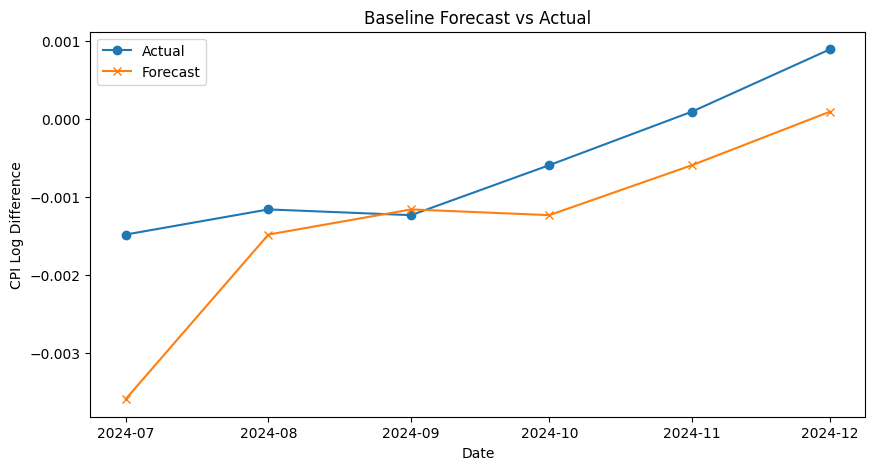

In [16]:
import matplotlib.pyplot as plt
# Plot the forecast vs actual
plt.figure(figsize=(10, 5))
plt.plot(y.index[-num_months:], y.iloc[-num_months:], label='Actual', marker='o')
plt.plot(y.index[-num_months:], y.shift().iloc[-num_months:], label='Forecast', marker='x')
plt.title('Baseline Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('CPI Log Difference')
plt.legend()
plt.show()